# Preparation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d
from matplotlib.axes import Axes
from ipywidgets import interact, fixed

# Create Utility Functions

In [6]:
def plot_svc_decision_function(
    model: SVC,
    ax: Axes | None = None,
    plot_support: bool = True
) -> None:    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
def plot_3D(
    elev: float = 30,
    azim: float = 30,
    X: np.ndarray | None = None,
    y: np.ndarray | None = None,
    r: np.ndarray | None = None
):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

# Create Dummy Data (Non Linear)

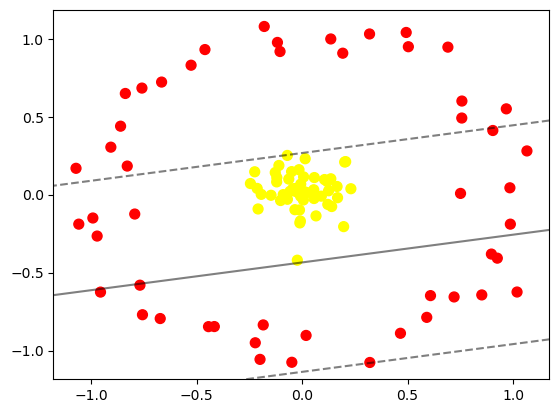

In [7]:
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [12]:
r = np.sin(X[:, 0]) + np.cos(X[:, 1]) 

interact(
    plot_3D,
    elev=[-90, 45, 30, 20 , 10],
    azim=(-180, 180),
    X=fixed(X),
    y=fixed(y),
    r=fixed(r)
)

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev: float = 30, azim: float = 30, X: numpy.ndarray | None = None, y: numpy.ndarray | None = None, r: numpy.ndarray | None = None)>

# Model Training

In [13]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

,C,1000000.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# Visualize The Result

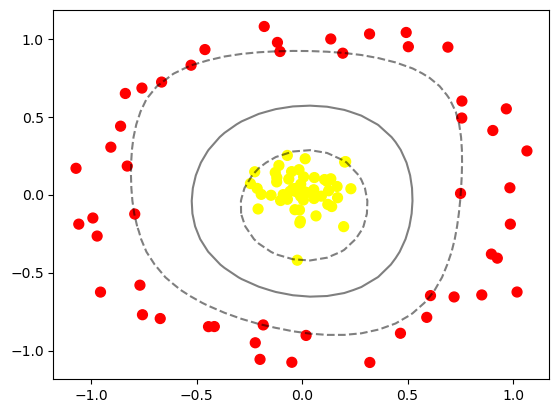

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')